# Customer Segmentation using KMeans

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Customers.csv')

In [3]:
df.head(3)

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Female,19,18135,84
1,2,Male,25,14536,60
2,3,Male,28,11121,15


## Investigating Data

In [4]:
df.shape

(216, 5)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,216.0,108.500000,62.498000,1.0,54.75,108.5,162.25,216.0
Age,216.0,38.833333,13.654542,18.0,29.00,35.5,49.00,70.0
Annual_Income,216.0,63136.944444,26718.408414,11121.0,43000.00,63000.0,79000.00,137000.0
Spending_Score,216.0,50.532407,26.234167,1.0,32.00,50.0,73.00,99.0


In [34]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual_Income  Spending_Score
0             1  Female   19          18135              84
1             2    Male   25          14536              60
2             3    Male   28          11121              15
3             4  Female   23          16700              67
4             5  Female   31          14998              48
..          ...     ...  ...            ...             ...
211         212  Female   35          97000              35
212         213  Female   34          96899              88
213         214    Male   47          98000              18
214         215  Female   28         121000              90
215         216  Female   43          98700              37

[216 rows x 5 columns]>

In [35]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

In [36]:
# check if there are missing values
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [37]:
# chekc if there are duplicates
df.duplicated().any()

False

In [53]:
def distriPlot1 (col, plt_title, data1=df):
    plt.figure()
    sns.displot(data=data1, x=col, hue='Gender')
    plt.title(plt_title)

<Figure size 432x288 with 0 Axes>

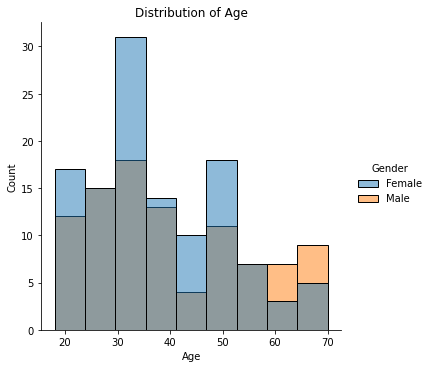

In [54]:
distriPlot1(df['Age'], 'Distribution of Age')

<Figure size 432x288 with 0 Axes>

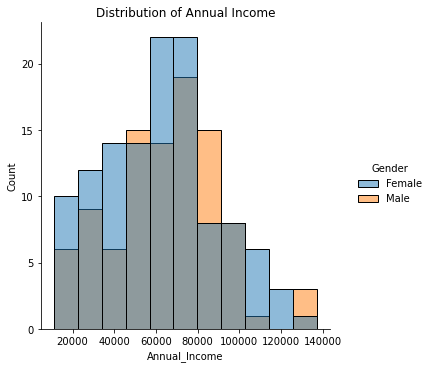

In [55]:
distriPlot1(df['Annual_Income'], 'Distribution of Annual Income')

<Figure size 432x288 with 0 Axes>

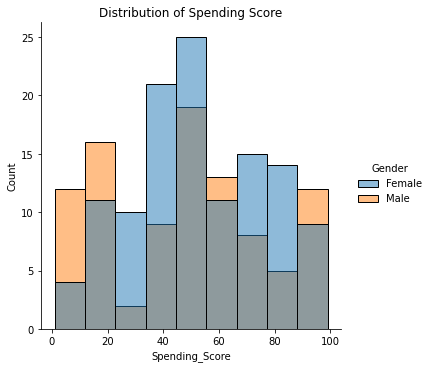

In [56]:
distriPlot1(df['Spending_Score'], 'Distribution of Spending Score')

In [71]:
def KDEPlot1 (col, plt_title, data1=df):
    plt.figure()
    sns.kdeplot(data=data1, x=col, hue='Gender')
    plt.title(plt_title)

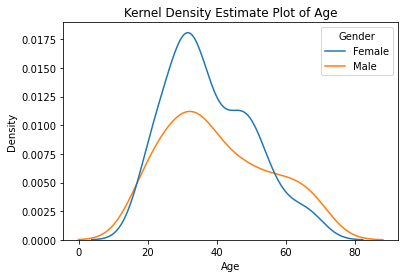

In [72]:
KDEPlot1(df['Age'], 'Kernel Density Estimate Plot of Age')

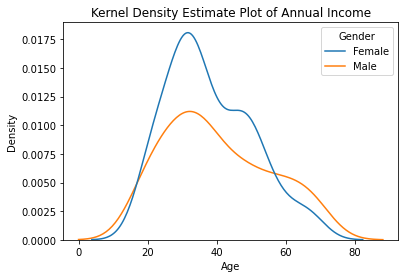

In [73]:
KDEPlot1(df['Age'], 'Kernel Density Estimate Plot of Annual Income')

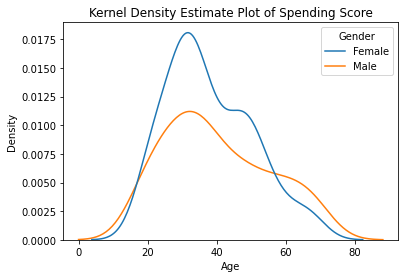

In [74]:
KDEPlot1(df['Age'], 'Kernel Density Estimate Plot of Spending Score')

In [61]:
def BoxPlot1 (col, plt_title, data1=df):
    plt.figure()
    sns.boxplot(data=data1, x='Gender', y=col)
    plt.title(plt_title)

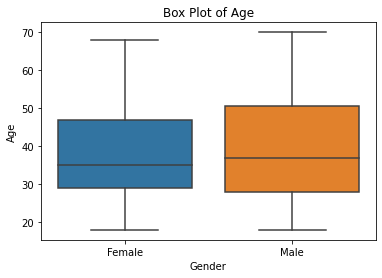

In [62]:
BoxPlot1(df['Age'], 'Box Plot of Age')

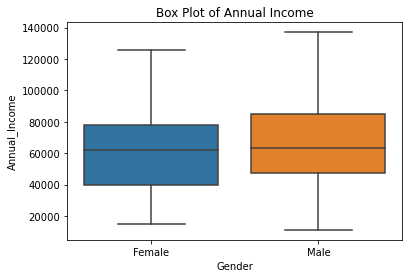

In [63]:
BoxPlot1(df['Annual_Income'], 'Box Plot of Annual Income')

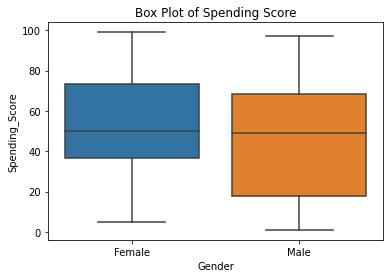

In [64]:
BoxPlot1(df['Spending_Score'], 'Box Plot of Spending Score')

In [69]:
print(df['Gender'].value_counts());
print(df['Gender'].value_counts(normalize=True))

Female    120
Male       96
Name: Gender, dtype: int64
Female    0.555556
Male      0.444444
Name: Gender, dtype: float64


In [77]:
df1= df.drop('CustomerID',axis=1)

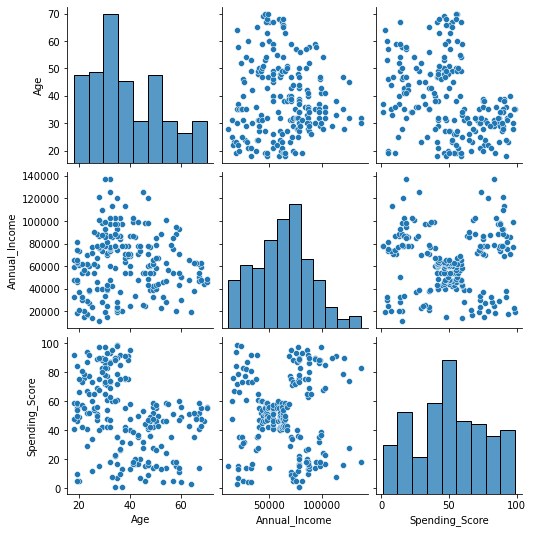

In [104]:
sns.pairplot(df1)

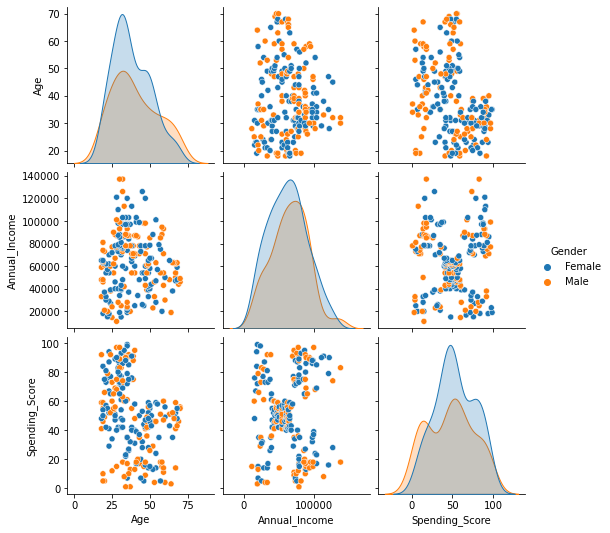

In [80]:
sns.pairplot(df1,hue='Gender')

In [92]:
df1.groupby(['Gender'])['Age', 'Annual_Income', 'Spending_Score'].mean().rename(
    columns={'Age': 'Average Age', 'Annual_Income': 'Average Annual Income', 'Spending_Score': 'Average Spending Score'})

,Average Age,Average Annual Income,Average Spending Score
Gender,,,
Female,37.866667,61768.916667,52.900000
Male,40.041667,64846.979167,47.572917


In [93]:
df1.groupby(['Gender'])['Age', 'Annual_Income', 'Spending_Score'].median().rename(
    columns={'Age': 'Median Age', 'Annual_Income': 'Median Annual Income', 'Spending_Score': 'Median Spending Score'})

,Median Age,Median Annual Income,Median Spending Score
Gender,,,
Female,35.0,62000.0,50.0
Male,37.0,63500.0,49.0


<AxesSubplot:>

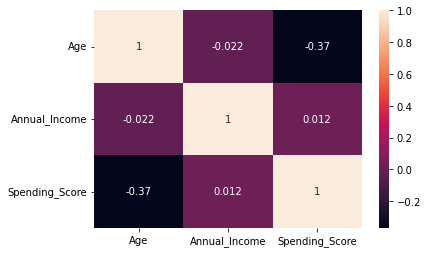

In [94]:
sns.heatmap(df1.corr(), annot=True)

<AxesSubplot:xlabel='Annual_Income', ylabel='Spending_Score'>

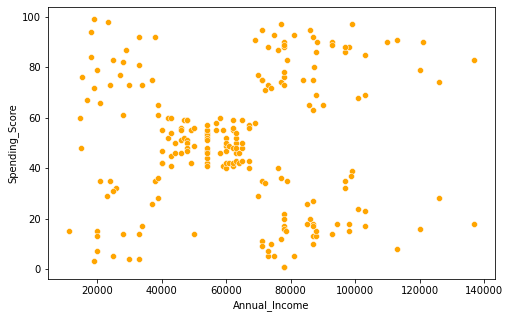

In [102]:
# Scatterplot between Annual_Income and Spending_Score
plt.figure(figsize=(8,5))
sns.scatterplot('Annual_Income','Spending_Score',data=df1, color="orange")

## Clustering 

In [107]:
# Rescaling
ary1=np.array(df1[['Annual_Income', 'Spending_Score']])
ary1

array([[ 18135,     84],
       [ 14536,     60],
       [ 11121,     15],
       [ 16700,     67],
       [ 14998,     48],
       [ 15151,     76],
       [ 20000,      7],
       [ 18000,     94],
       [ 19000,      3],
       [ 19000,     72],
       [ 50000,     14],
       [ 19000,     99],
       [ 20000,     15],
       [ 27000,     77],
       [ 20000,     13],
       [ 20000,     79],
       [ 21000,     35],
       [ 21000,     66],
       [ 23000,     29],
       [ 23231,     98],
       [ 24000,     35],
       [ 24000,     73],
       [ 25000,      5],
       [ 25000,     83],
       [ 28000,     14],
       [ 28000,     82],
       [ 26000,     32],
       [ 28000,     61],
       [ 25000,     31],
       [ 29000,     87],
       [ 30000,      4],
       [ 30000,     73],
       [ 33000,      4],
       [ 33000,     92],
       [ 33000,     14],
       [ 33000,     81],
       [ 34000,     17],
       [ 34000,     73],
       [ 37000,     26],
       [ 37000,     75],


In [108]:
scaler = StandardScaler() 
ary1_scaled = scaler.fit_transform(ary1)
ary1_scaled

array([[-1.68821728,  1.27868875],
       [-1.82323131,  0.36172617],
       [-1.95134271, -1.35757867],
       [-1.74205032,  0.62917359],
       [-1.80589969, -0.09675512],
       [-1.80016   ,  0.97303456],
       [-1.61825307, -1.66323286],
       [-1.69328171,  1.66075649],
       [-1.65576739, -1.81605996],
       [-1.65576739,  0.82020746],
       [-0.49282352, -1.39578544],
       [-1.65576739,  1.85179037],
       [-1.61825307, -1.35757867],
       [-1.35565284,  1.01124133],
       [-1.61825307, -1.43399221],
       [-1.61825307,  1.08765488],
       [-1.58073876, -0.59344318],
       [-1.58073876,  0.59096682],
       [-1.50571012, -0.82268383],
       [-1.49704431,  1.81358359],
       [-1.4681958 , -0.59344318],
       [-1.4681958 ,  0.85841424],
       [-1.43068148, -1.73964641],
       [-1.43068148,  1.24048198],
       [-1.31813853, -1.39578544],
       [-1.31813853,  1.2022752 ],
       [-1.39316716, -0.7080635 ],
       [-1.31813853,  0.39993295],
       [-1.43068148,

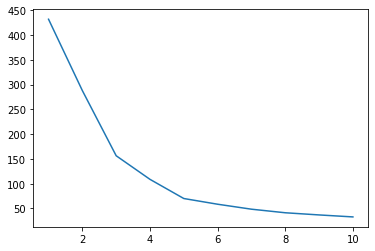

In [109]:
# Use elbow method to determine k value
intertia_scores=[]
for n in range(1,11):
    kmeans=KMeans(n_clusters=n)
    kmeans.fit(ary1_scaled)
    intertia_scores.append(kmeans.inertia_)
plt.plot(range(1,11),intertia_scores)

In [115]:
df_scaled = pd.DataFrame(ary1_scaled, columns=['Income_s', 'Score_s'])
df_scaled.head()

,Income_s,Score_s
0,-1.688217,1.278689
1,-1.823231,0.361726
2,-1.951343,-1.357579
3,-1.742050,0.629174
4,-1.805900,-0.096755


In [123]:
clustering = KMeans(n_clusters=5)
clustering.fit(df_scaled[['Income_s','Score_s']])
df_scaled['Cluster'] =clustering.labels_
df_scaled.head(3)

,Income_s,Score_s,Spending and Income Cluster,Cluster
0,-1.688217,1.278689,2,4
1,-1.823231,0.361726,2,4
2,-1.951343,-1.357579,4,3


Text(0.5, 1.0, 'KMeans Clustering - Customer Segamentation')

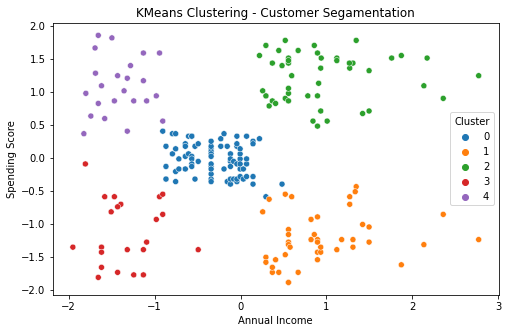

In [128]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_scaled, x ='Income_s',y='Score_s',hue='Cluster',palette='tab10')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('KMeans Clustering - Customer Segamentation')